<h1> Logistic Regression with Diabetes dataset

<h2> In this notebook we will cover </h2>

    1.Data Acquisition
    2. Data Preparation and Manipulation
    3. Exploratory Data Analysis
    4. Data Medeling, Loistic regressiona nd evaluation of Model. 


<h2> Importing Desired Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> 1. Data Acquisition

In [3]:
data_df= pd.read_csv('diabetes2.csv')

In [5]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h5> The above dataset has no null values and has only numerical values

In [11]:
# total count of Unique data 
data_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
#describe data 
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h5> Some columns like Glucose, Blood Pressure, Skin thickness, Insulin and BMI has data value as 0. Which is in correct 
    Pregnacies can be zero. 
    
    
    Hence, we are replacing the values to their respective mean values of the column. 

In [15]:
# Now lets see how many records has 0 values 
print("num of zeros in Glucose", data_df['Glucose'].isin([0]).sum())
print("num of zeros in BloodPressure", data_df['BloodPressure'].isin([0]).sum())
print("num of zeros in SkinThickness", data_df['SkinThickness'].isin([0]).sum())
print("num of zeros in Insulin", data_df['Insulin'].isin([0]).sum())
print("num of zeros in BMI", data_df['BMI'].isin([0]).sum())

num of zeros in Glucose 5
num of zeros in BloodPressure 35
num of zeros in SkinThickness 227
num of zeros in Insulin 374
num of zeros in BMI 11


<h3> 2. Data Preparation and Manipulation

In [18]:
#replacing all the zero values with respective column mean values. 
data_pre=data_df.copy()

data_pre['Glucose']=data_pre['Glucose'].replace(0,data_df['Glucose'].mean())
data_pre['BloodPressure']=data_pre['BloodPressure'].replace(0,data_df['BloodPressure'].mean())
data_pre['SkinThickness']=data_pre['SkinThickness'].replace(0,data_df['SkinThickness'].mean())
data_pre['Insulin']=data_pre['Insulin'].replace(0,data_df['Insulin'].mean())
data_pre['BMI']=data_pre['BMI'].replace(0,data_df['BMI'].mean())

In [19]:
data_pre.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
#updating pregnancy values more than 0 into 1
data_pre['Pregnancies'].values[data_pre['Pregnancies']>1]=1

In [21]:
data_pre.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3> Exploratory Data Analysis

In [22]:
#checking corelation of the parameters using heat map

data_pre.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.017816,-0.038159,-0.067654,-0.008117,-0.161757,-0.060780,0.197159,0.005705
Glucose,-0.017816,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,-0.038159,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.067654,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.008117,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,-0.161757,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.060780,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.197159,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.005705,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

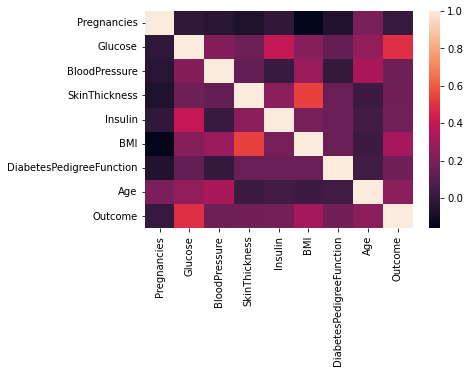

In [23]:
sns.heatmap(data_pre.corr())

<h5> 
    1.From above map it is clear that their is strong corelation between BMI and SkinThikness
    2.The outcome is corelated with Glucose and BMI
    3.There is no reverse corelation between outcome and other independent variables.
    4.We can observe some more correlation between Age and blood pressure and Insulin and glucose

Text(0.5, 1.0, 'Insulin vs Glucose')

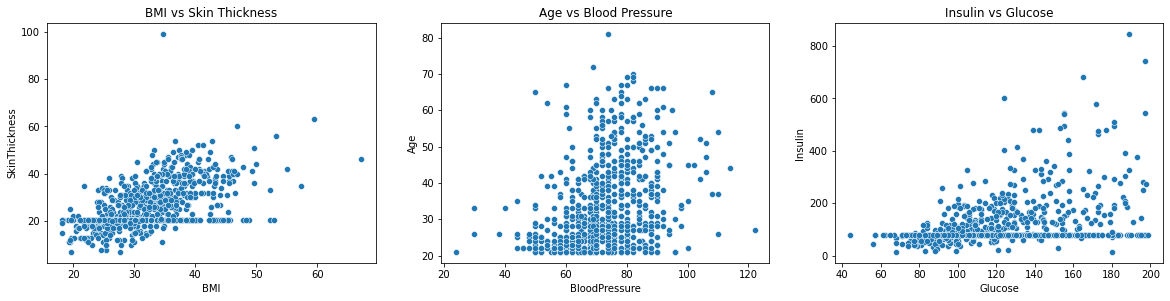

In [25]:
#lets evaluate some more insights that the data has :

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.scatterplot(data=data_pre,x="BMI",y="SkinThickness")
plt.title('BMI vs Skin Thickness')
plt.subplot(3,3,2)
sns.scatterplot(data=data_pre, x="BloodPressure", y="Age")
plt.title('Age vs Blood Pressure')
plt.subplot(3,3,3)
sns.scatterplot(data=data_pre, x="Glucose", y="Insulin")
plt.title('Insulin vs Glucose')

<h5> 
    1. We found strong relationship between 2 independent variable 'BMI' and 'Skin thickness'
    2. But compare to Skinthickness BMI has strong relationship with y variable 'Outcome'
    3. Hence, we are dropping Skinthickness to avoid any multi collinearity. 

In [26]:
data_pre=data_pre.drop('SkinThickness', axis=1)

In [27]:
data_pre.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.0,72.0,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,79.799479,26.6,0.351,31,0
2,1,183.0,64.0,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,168.000000,43.1,2.288,33,1


<h5> Now lest check BMI and Glucose, which are the most influencing variable in current situation 

Text(0.5, 1.0, 'Outliers identification in Glucose data')

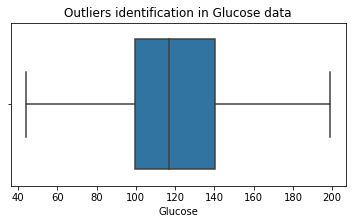

In [28]:
# checking outliers of Glucose using a Boxplot

plt.figure(figsize=(6,3))
sns.boxplot(x=data_pre['Glucose'])
plt.title('Outliers identification in Glucose data')

## No Outliers are found in Glucose

Text(0.5, 1.0, 'Outliers identification in BMI data')

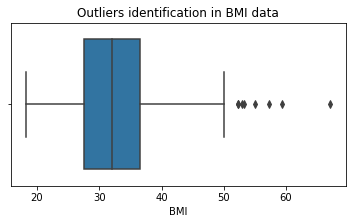

In [29]:
# checking outliers of BMI using a Boxplot

plt.figure(figsize=(6,3))
sns.boxplot(x=data_pre['BMI'])
plt.title('Outliers identification in BMI data')



In [30]:
#checking and removing outliers in BMI data 

# creating Quartiles for removal of Outliers.
Q1=data_pre['BMI'].quantile(0.25)
Q3=data_pre['BMI'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
Totaloutlier=((data_pre['BMI']<lowoutlier)|(data_pre['BMI']>highoutlier)).sum()

In [32]:
Totaloutlier
#there are 8 total outliers in BMI data 

8

In [34]:
#removing Outliers 
data_pre_v1=data_pre[(data_pre['BMI']<highoutlier)&(data_pre['BMI']>lowoutlier)]


# dataframe data_pre_v1 doesnt contain any outlier for BMI 

In [35]:
#verifying the dataframe 

TotalOutlier_v1=((data_pre_v1['BMI']<lowoutlier)| (data_pre_v1['BMI']>highoutlier)).sum()
print('Total outliers in new dataframe data_pre_v1 : {}'.format(TotalOutlier_v1) )

Total outliers in new dataframe data_pre_v1 : 0


<h3> Data Modeling, Logistic Regression example and evaluation of Model 

<h3> Logistic Regression

In [36]:
# loading required libraries from sci-kit learn for logistic regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
#Define X and y variables. 

#y = outcome
y=data_pre_v1['Outcome']
#x= all other variables
X=data_pre_v1.drop('Outcome', axis=1)


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 760, dtype: int64

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,stratify=y, random_state=101)


In [45]:
y_test

57     0
405    0
671    0
160    0
325    0
      ..
750    1
395    0
329    0
95     0
385    0
Name: Outcome, Length: 228, dtype: int64

In [46]:
model_lr=LogisticRegression()

In [47]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred=model_lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [50]:
#Evaluate our Model using Classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       149
           1       0.70      0.57      0.63        79

    accuracy                           0.77       228
   macro avg       0.75      0.72      0.73       228
weighted avg       0.76      0.77      0.76       228



<h5> 
    1. Precision : Precision measures the proportion of true positive predictions among all positive predictions. Here the precision for the daibetic class in 0.7 or 70% of the predicted were actually diabetic. 
    2. Recall : Recall measures the proportion of true positives predictions among all actual positive in dataset. Here the recall is 0.57 or 57% were correctly identified of all diabetics. 
    3. F1-Score : The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. The F1-score of all daibetic is 0.63 or 63%. 
    4. Accuracy : Acciracy is one metric for evaluating, the fraction of prediction of our model got right. Here, the accuracy of our model is 0.77 or 77%. But, since in our dataset there weremor number of non diabetic / negative outcome, the classifier report may be baised. Hence, Accuracy metric in this case may not be useful. 
    

<h3> Now lets plot Logistic regression plots for all variables vs Outcome column 
    
  

Text(0.5, 1.0, 'Age vs Outcome')

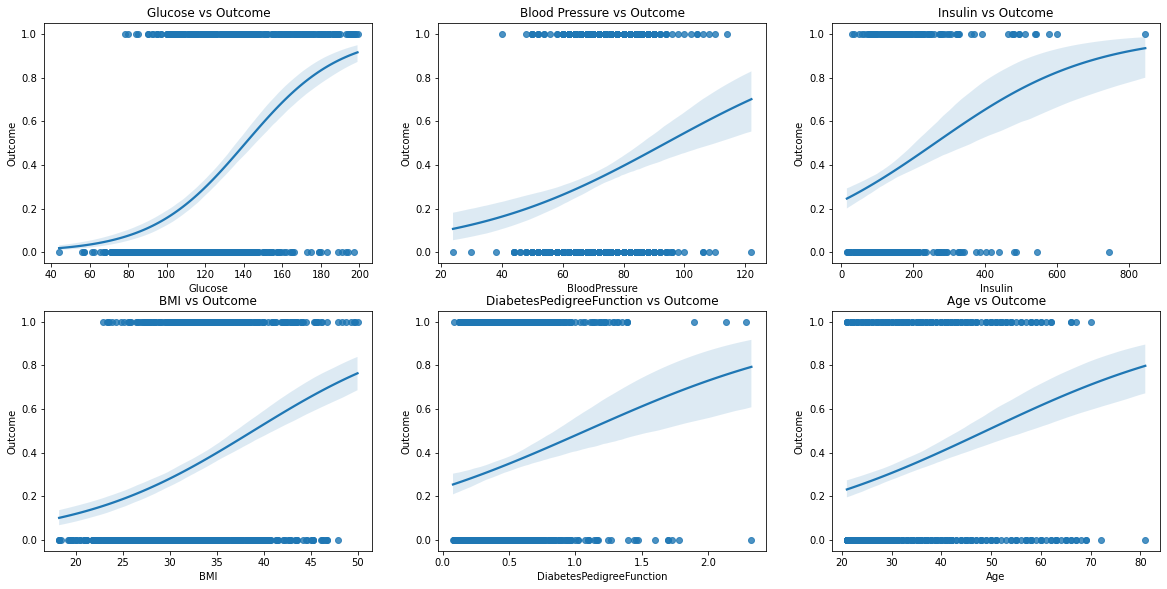

In [72]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.regplot(x='Glucose', y=y, data=data_pre_v1, logistic=True)
plt.title('Glucose vs Outcome')
plt.subplot(3,3,2)
sns.regplot(x='BloodPressure', y=y, data=data_pre_v1, logistic=True)
plt.title('Blood Pressure vs Outcome')
plt.subplot(3,3,3)
sns.regplot(x='Insulin', y=y, data=data_pre_v1, logistic=True)
plt.title('Insulin vs Outcome')
plt.subplot(3,3,4)
sns.regplot(x='BMI', y=y, data=data_pre_v1, logistic=True)
plt.title('BMI vs Outcome')
plt.subplot(3,3,5)
sns.regplot(x='DiabetesPedigreeFunction', y=y, data=data_pre_v1, logistic=True)
plt.title('DiabetesPedigreeFunction vs Outcome')
plt.subplot(3,3,6)
sns.regplot(x='Age', y=y, data=data_pre_v1, logistic=True)
plt.title('Age vs Outcome')